In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import requests
import gmaps
import os
import math
# Import API key
from config import g_key
gmaps.configure(api_key=g_key)

ABS_path = "Data/ABS_Labourstatus_Data.csv"
ABS_metadata = pd.read_csv(ABS_path, low_memory = False)
ABS_metadata

,AGE,Age,SEX_ABS,Sex,LFSP_C16,Labour force status,STATE,State,REGIONTYPE,Geography Level,LGA_2016,Region,TIME,Census year,Value,Flag Codes,Flags
0,A15,15 - 19,1,Males,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury (C),2016.0,2016.0,236.0,NaN,NaN
1,A15,15 - 19,2,Females,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury (C),2016.0,2016.0,113.0,NaN,NaN
2,A15,15 - 19,3,Persons,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury (C),2016.0,2016.0,348.0,NaN,NaN
3,A15,15 - 19,1,Males,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10130,Armidale Regional (A),2016.0,2016.0,105.0,NaN,NaN
4,A15,15 - 19,2,Females,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10130,Armidale Regional (A),2016.0,2016.0,58.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158545,T55,55 - 64,1,Males,4,"Employed, hours of work not stated",1,New South Wales,LGA2016,Local Government Areas (2016),11100,Botany Bay (C),2016.0,2016.0,32.0,NaN,NaN
158546,T45,45 - 54,2,Females,TOT,Total,3,Queensland,LGA2016,Local Government Areas (2016),33830,Hope Vale (S),2016.0,2016.0,45.0,NaN,NaN
158547,T25,25 - 34,2,Females,4,"Employed, hours of work not stated",5,Western Australia,LGA2016,Local Government Areas (2016),57000,Perenjori (S),2016.0,2016.0,0.0,NaN,NaN
158548,T75,75 - 84,1,Males,LF,Total Labour Force,1,New South Wales,LGA2016,Local Government Areas (2016),12930,Georges River (A),2016.0,2016.0,167.0,NaN,NaN


In [2]:
#Remove Flag Code and Flags Colums
ABS_metadata = ABS_metadata.drop(['Flag Codes', 'Flags'], axis=1)
#Remove NaN rows
ABS_metadata = ABS_metadata.dropna()
ABS_metadata

,AGE,Age,SEX_ABS,Sex,LFSP_C16,Labour force status,STATE,State,REGIONTYPE,Geography Level,LGA_2016,Region,TIME,Census year,Value
0,A15,15 - 19,1,Males,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury (C),2016.0,2016.0,236.0
1,A15,15 - 19,2,Females,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury (C),2016.0,2016.0,113.0
2,A15,15 - 19,3,Persons,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury (C),2016.0,2016.0,348.0
3,A15,15 - 19,1,Males,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10130,Armidale Regional (A),2016.0,2016.0,105.0
4,A15,15 - 19,2,Females,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10130,Armidale Regional (A),2016.0,2016.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158544,T55,55 - 64,1,Males,LF,Total Labour Force,5,Western Australia,LGA2016,Local Government Areas (2016),58400,Trayning (S),2016.0,2016.0,22.0
158545,T55,55 - 64,1,Males,4,"Employed, hours of work not stated",1,New South Wales,LGA2016,Local Government Areas (2016),11100,Botany Bay (C),2016.0,2016.0,32.0
158546,T45,45 - 54,2,Females,TOT,Total,3,Queensland,LGA2016,Local Government Areas (2016),33830,Hope Vale (S),2016.0,2016.0,45.0
158547,T25,25 - 34,2,Females,4,"Employed, hours of work not stated",5,Western Australia,LGA2016,Local Government Areas (2016),57000,Perenjori (S),2016.0,2016.0,0.0


In [3]:
#Removing Local Government Type
new = ABS_metadata['Region'].str.split('(', n = 1, expand = True)
ABS_metadata['Region'] = new[0]
ABS_metadata

,AGE,Age,SEX_ABS,Sex,LFSP_C16,Labour force status,STATE,State,REGIONTYPE,Geography Level,LGA_2016,Region,TIME,Census year,Value
0,A15,15 - 19,1,Males,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury,2016.0,2016.0,236.0
1,A15,15 - 19,2,Females,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury,2016.0,2016.0,113.0
2,A15,15 - 19,3,Persons,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury,2016.0,2016.0,348.0
3,A15,15 - 19,1,Males,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10130,Armidale Regional,2016.0,2016.0,105.0
4,A15,15 - 19,2,Females,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10130,Armidale Regional,2016.0,2016.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158544,T55,55 - 64,1,Males,LF,Total Labour Force,5,Western Australia,LGA2016,Local Government Areas (2016),58400,Trayning,2016.0,2016.0,22.0
158545,T55,55 - 64,1,Males,4,"Employed, hours of work not stated",1,New South Wales,LGA2016,Local Government Areas (2016),11100,Botany Bay,2016.0,2016.0,32.0
158546,T45,45 - 54,2,Females,TOT,Total,3,Queensland,LGA2016,Local Government Areas (2016),33830,Hope Vale,2016.0,2016.0,45.0
158547,T25,25 - 34,2,Females,4,"Employed, hours of work not stated",5,Western Australia,LGA2016,Local Government Areas (2016),57000,Perenjori,2016.0,2016.0,0.0


In [4]:
#State just WA
ABS_WA_data = ABS_metadata.set_index('STATE')

In [5]:
ABS_WA_data = ABS_WA_data.drop([1,2,3,4,6,7,8,9], inplace=False)

In [6]:
ABS_WA_data = ABS_WA_data.reset_index()
ABS_WA_data

,STATE,AGE,Age,SEX_ABS,Sex,LFSP_C16,Labour force status,State,REGIONTYPE,Geography Level,LGA_2016,Region,TIME,Census year,Value
0,5,A15,15 - 19,1,Males,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50080,Albany,2016.0,2016.0,204.0
1,5,A15,15 - 19,2,Females,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50080,Albany,2016.0,2016.0,101.0
2,5,A15,15 - 19,3,Persons,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50080,Albany,2016.0,2016.0,302.0
3,5,A15,15 - 19,1,Males,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50210,Armadale,2016.0,2016.0,280.0
4,5,A15,15 - 19,2,Females,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50210,Armadale,2016.0,2016.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39207,5,T65,65 - 74,1,Males,4,"Employed, hours of work not stated",Western Australia,LGA2016,Local Government Areas (2016),53640,Gnowangerup,2016.0,2016.0,0.0
39208,5,T75,75 - 84,2,Females,UEMP,Total Unemployed,Western Australia,LGA2016,Local Government Areas (2016),52310,Cuballing,2016.0,2016.0,0.0
39209,5,T65,65 - 74,2,Females,6,"Unemployed, looking for part-time work",Western Australia,LGA2016,Local Government Areas (2016),57080,Perth,2016.0,2016.0,5.0
39210,5,T55,55 - 64,1,Males,LF,Total Labour Force,Western Australia,LGA2016,Local Government Areas (2016),58400,Trayning,2016.0,2016.0,22.0


In [7]:
#import region/district
path_region_district= 'Data/region_by_district_wa.csv'
region_district = pd.read_csv(path_region_district)
region_district.head()
#income_by_district=pd.merge(wa_mean_income_by_LGA,region_district,left_on=‘Region’,right_on=‘Region’)

,Region,District
0,Albany,Great Southern District
1,Armadale,Armadale District
2,Ashburton,Pilbara District
3,Augusta-Margaret River,South West District
4,Bassendean,Midland District


In [8]:
District_pops = ABS_WA_data.loc[(ABS_WA_data["Labour force status"] == "Total")]
District_pops = District_pops.groupby("Region").sum()
District_pops = District_pops.drop(['STATE', 'SEX_ABS','TIME',"Census year"], axis=1)
District_pops = District_pops.rename(columns = {"Value":"Total Persons"})
District_pops["Total Persons"] = District_pops["Total Persons"].astype(int)
District_pops["Total Persons"] = District_pops["Total Persons"].round(0)
District_pops

,Total Persons
Region,
Albany,106766
Armadale,200914
Ashburton,40444
Augusta-Margaret River,40123
Bassendean,43305
...,...
Wyalkatchem,1512
Wyndham-East Kimberley,20716
Yalgoo,1062


In [9]:
pop_by_district=pd.merge(District_pops,region_district,left_on='Region',right_on='Region')
pop_by_district

,Region,Total Persons,District
0,Albany,106766,Great Southern District
1,Armadale,200914,Armadale District
2,Ashburton,40444,Pilbara District
3,Augusta-Margaret River,40123,South West District
4,Bassendean,43305,Midland District
...,...,...,...
134,Wyalkatchem,1512,Wheatbelt District
135,Wyndham-East Kimberley,20716,Kimberley District
136,Yalgoo,1062,Mid West-Gascoyne District
137,Yilgarn,3642,Wheatbelt District


In [10]:
District_pops = pop_by_district.groupby("District").sum()


In [25]:
pop_path = "District_Population.csv"
District_pops = pd.read_csv(pop_path, low_memory = False)
District_pops

,District,Total Persons
0,Armadale District,175720
1,Cannington District,173775
2,Fremantle District,210501
3,Goldfields-Esperance Region,42383
4,Great Southern District,63406
5,Joondalup District,269926
6,Kimberley District,25983
7,Mandurah District,207250
8,Mid West-Gascoyne District,48069
9,Midland District,195036


In [26]:
District_pops["Reference Capital"] = ["Armadale","Cannington","Fremantle","Espearance","Albany","Joondalup","Broome","Mandurah","Carnarvon","Midland","Mirrabooka","Perth City","Karratha","Bunbury","Northam"]
District_pops

,District,Total Persons,Reference Capital
0,Armadale District,175720,Armadale
1,Cannington District,173775,Cannington
2,Fremantle District,210501,Fremantle
3,Goldfields-Esperance Region,42383,Espearance
4,Great Southern District,63406,Albany
5,Joondalup District,269926,Joondalup
6,Kimberley District,25983,Broome
7,Mandurah District,207250,Mandurah
8,Mid West-Gascoyne District,48069,Carnarvon
9,Midland District,195036,Midland


In [27]:
District_pops["Lat"] = ""
District_pops["Lng"] = ""
District_pops

,District,Total Persons,Reference Capital,Lat,Lng
0,Armadale District,175720,Armadale,,
1,Cannington District,173775,Cannington,,
2,Fremantle District,210501,Fremantle,,
3,Goldfields-Esperance Region,42383,Espearance,,
4,Great Southern District,63406,Albany,,
5,Joondalup District,269926,Joondalup,,
6,Kimberley District,25983,Broome,,
7,Mandurah District,207250,Mandurah,,
8,Mid West-Gascoyne District,48069,Carnarvon,,
9,Midland District,195036,Midland,,


In [28]:
base_url = "https://maps.googleapis.com/maps/api/place/textsearch/json"
lat = 31.9505
lng = 115.8605
params = {
    "radius": 50000,
    "key": g_key,
    "location": f"{lat},{lng}"
}


for index, row in District_pops.iterrows():
    
    keyword = row["Reference Capital"]
    
    params["query"] = f"{keyword}, Western Australia"
    
    location_info = requests.get(base_url, params=params)
    
    location_info_json = location_info.json()
    
    print(f"Searching for {keyword}")
    
    try:
        District_pops.loc[index, "Lat"] = location_info_json["results"][0]['geometry']['location']['lat']
        District_pops.loc[index, "Lng"] = location_info_json["results"][0]['geometry']['location']['lng']
    
    except (KeyError, IndexError):
        print("Not Found :(")  
    
    print("-----------------------------")
    

Searching for Armadale
-----------------------------
Searching for Cannington
-----------------------------
Searching for Fremantle
-----------------------------
Searching for Espearance
-----------------------------
Searching for Albany
-----------------------------
Searching for Joondalup
-----------------------------
Searching for Broome
-----------------------------
Searching for Mandurah
-----------------------------
Searching for Carnarvon
-----------------------------
Searching for Midland
-----------------------------
Searching for Mirrabooka
-----------------------------
Searching for Perth City
-----------------------------
Searching for Karratha
-----------------------------
Searching for Bunbury
-----------------------------
Searching for Northam
-----------------------------


In [29]:
District_pops_Indexed = District_pops.reset_index()
District_pops_Indexed = District_pops_Indexed.replace({'Goldfields-Esperance Region':'Goldfields-Esperance District'})
District_pops_Indexed

,index,District,Total Persons,Reference Capital,Lat,Lng
0,0,Armadale District,175720,Armadale,-32.147301,116.012876
1,1,Cannington District,173775,Cannington,-32.017868,115.934665
2,2,Fremantle District,210501,Fremantle,-32.051819,115.755109
3,3,Goldfields-Esperance District,42383,Espearance,-33.861310,121.891424
4,4,Great Southern District,63406,Albany,-35.026934,117.883721
5,5,Joondalup District,269926,Joondalup,-31.733922,115.765730
6,6,Kimberley District,25983,Broome,-17.964429,122.230366
7,7,Mandurah District,207250,Mandurah,-32.536104,115.742408
8,8,Mid West-Gascoyne District,48069,Carnarvon,-24.887747,113.662183
9,9,Midland District,195036,Midland,-31.891764,116.013459


In [30]:
figure_layout = {
    'width': '800px',
    'height': '800px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)


info_box_template = """
<dt>{District}</dt>
<dd>{Reference Capital}</dd>
<dd>Total Persons: {Total Persons}</dd>
"""

District_popsinfo = [info_box_template.format(**row) for index, row in District_pops_Indexed.iterrows()]
locations = District_pops_Indexed[["Lat", "Lng"]]

markers = gmaps.marker_layer(locations, info_box_content=District_popsinfo)
                             

fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='1px', wi…

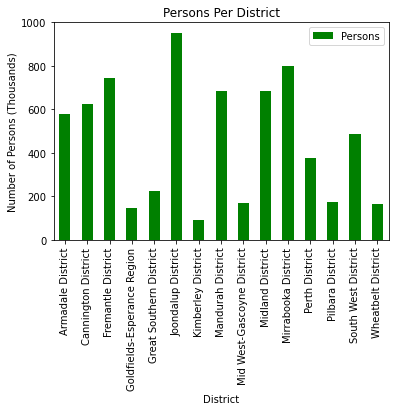

In [17]:
District_Totals = District_pops_Indexed.set_index('District')
District_Totals["Persons"] = District_Totals["Total Persons"] / 1000
District_Totals = District_Totals.drop(['Reference Capital','Lat','Lng','Total Persons'], axis=1)
District_Totals_plot  = District_Totals.plot(kind="bar",facecolor="green")
plt.title("Persons Per District")
#plt.ylim(0,30)
plt.xlabel("District")
plt.ylabel("Number of Persons (Thousands)")
plt.xticks(rotation=90)
#plt.tight_layout()
plt.legend(loc="best")
District_Totals_plot;